In [1]:
import pandas as pd 
import numpy as np 

In [2]:
# Read raw data
train = pd.read_csv(r"C:\Users\A\desktop\D.S\train.csv")
test = pd.read_csv(r"C:\Users\A\desktop\D.S\test.csv")

In [3]:
# Take a look at gross survival rate
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Alright, who've does not heard of the Taitainc tragedy from 101 years ago.
The Titanic struck a North Atlantic iceberg on April 14, 1912. 
in this task we're goig to perform analysis and machine learing modeling to make prediction of the survier and get better understanding of all overll tragedy.for more inforamtion on this dataset, it's avilabe on Kaggle website .


In [6]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

# Data dictinaory
 Survived:0=No, 1=Yes Pclass: Ticket class 1= 1st, 2=2en, 
=3rd
Sibsp:number of sibbiling / spouses aboard the 
Titanic Parch:number of parents / children aboard the Titanic Ticket: ticket number Cabin: cabin number 
embarked: port of Embarkation C = Cherbourg, Q= Queenstown, S= Southampton 


 ### EDA explortary data analyze
look at pattrn in data in order to build an effective model, sort out what catigorical and numrical is essitntial.
# which features are categorical ?
by looking at the data we have got:
1. categorical :
 survived, Sex, and Embarked.
2. continouse :
 Age, Fare
3. ordinal : 
 Pclass 
4. discrete :
 Sibsp and Parch.



###### learn about the data /  for each varibles: is it categorical and if not what the min, max and average value
###### are there missing value
###### get to know somthing about the ditrbuation of the valus


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Barton, Mr. David John",male,1601,G6,S
freq,1,577,7,4,644


In [10]:
# combine data sets
dataset1 = pd.concat([train, test], sort=True)

In [11]:
# There is some missing vlaue in both train and test data sets.
# considring the inforamtion, assumpation based on data analysis :
# compleating the missing value.
# correcting by drop any missing unecssary columns from data set. 
# classify woman, childbirth, the upper class. # what about embarked broke by Pclass since they related
# the shep has stoped in diffrent stations to carry on peaple
# so that explain the S, C and Q.
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
M = pd.DataFrame([Pclass1, Pclass2, Pclass3])
M.index = ['1st class','2nd class', '3rd class']
M.plot(kind='bar',stacked=True, figsize=(10,5))

Names


In [12]:
# Examine the first few names in the training set
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [13]:
# How many uniques Name it got? tow duplicate Names
train.Name.describe().value_counts()

891                       2
Barton, Mr. David John    1
1                         1
Name: Name, dtype: int64

In [14]:
# Tow duplicate names.
# get the dublicate names
dataset1.Name.duplicated().sum()


2

In [15]:
dataset1.loc[dataset1.Name.duplicated(keep='first'), :]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
6,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,NaN,330972


In [16]:
train.Name.str.contains('Mr').sum()

647

In [17]:
# what about the Mr and Miss...any correlations?
# is there any pattern regards titles thing? 


In [18]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [19]:
train_test = [train, test]

In [20]:
type(train_test)

list

In [21]:
# split out tiltes from names, to examine  
for dataset in train_test:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)


In [22]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Sir           1
Jonkheer      1
Capt          1
Ms            1
Countess      1
Mme           1
Don           1
Lady          1
Name: Title, dtype: int64

In [23]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [24]:
#dataset1['dataset']= dataset1.Name.apply(lambda name: name.split(','), [1].split('.'), [0].strip())

In [25]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [26]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [27]:
# No longer need Named so drop them off

train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [28]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [29]:
# Hypothesis - Name titles correlate with age
train[['Age', 'Title']].describe()


,Age,Title
count,714.000000,891.000000
mean,29.699118,0.710438
std,14.526497,0.968778
min,0.420000,0.000000
25%,20.125000,0.000000
50%,28.000000,0.000000
75%,38.000000,1.000000
max,80.000000,3.000000


In [30]:
# Hypothesis - Name titles correlate with Sex
train[['Sex', 'Title']].describe()

,Title
count,891.000000
mean,0.710438
std,0.968778
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [31]:
# whats the distribuation of females to male across dataset
train.loc[train.Sex=='male', 'Sex'].value_counts()


male    577
Name: Sex, dtype: int64

In [32]:
train.loc[train.Sex=='female', 'Sex'].value_counts()

female    314
Name: Sex, dtype: int64

### To get a better undersanding of data let expand upon the realtionship among survived, Pclass, sex, SibSp and Parch and explor it by visualization 

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [35]:
# Load up seaborn library to use for visualization 
def bar_chart(feature):
    Survived = train[train['Survived']==1][feature].value_counts()
    dead =     train[train['Survived']==0][feature].value_counts()
    M = pd.DataFrame([Survived, dead])
    M.index = ['Survived', 'Dead']
    M.plot(kind='barh', stacked=True,  figsize=(10, 5))
    

In [36]:
# Distribuation across classes
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


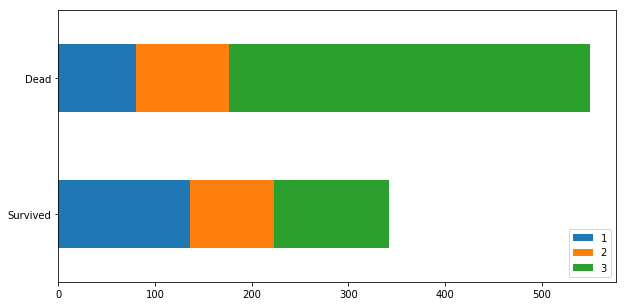

In [37]:
# (hypothesis) Be in the first class got high rate for survival.
# yeah, people in first class tend to have higher survival rate.
bar_chart('Pclass')

In [38]:
# Female tend to have highe survival (ladyis first!)
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


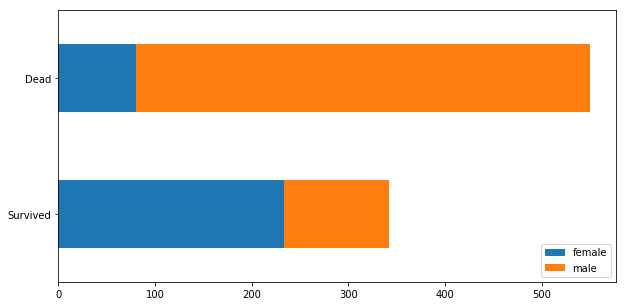

In [39]:
bar_chart('Sex')

In [40]:
# the bigger the sibilng the less chance of survival
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


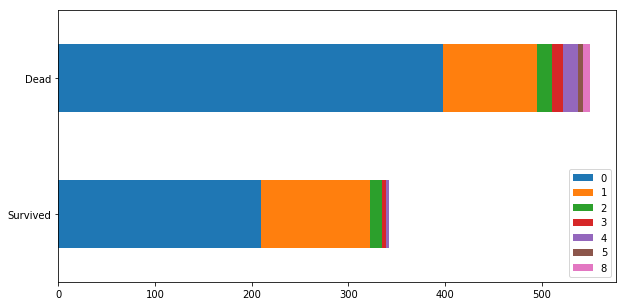

In [41]:
bar_chart('SibSp')

In [42]:
# Parch is the number of parents/ childerien abraod.
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


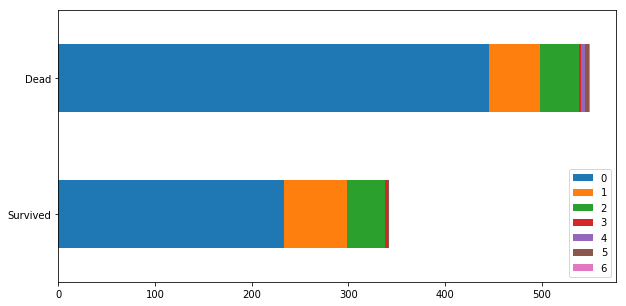

In [43]:
bar_chart('Parch')

### Sex

In [44]:
# OK, age and sex seem quite important as derived from analysis of title, let's take a closer 
# look at the distibutions of age over entire data set
train.loc[train.Sex=='male', 'Sex'].value_counts()

male    577
Name: Sex, dtype: int64

In [45]:
train.loc[train.Sex=='female', 'Sex'].value_counts()

female    314
Name: Sex, dtype: int64

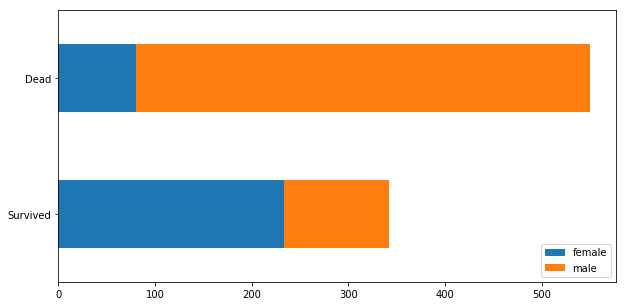

In [46]:
# visualize the way of realtionship of Sex, Age, Pclass 
bar_chart('Sex')

In [47]:
 sex_mapping = {"male": 0, "female": 1}
for dataset in train_test:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


### Age

In [49]:
# whats the distrbuation rate of age 
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [50]:
# there are a missing values of Ages.
# visualize before and after of the correctness of the missing vlaues.

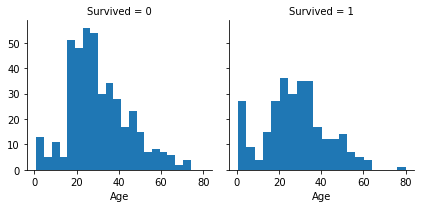

In [51]:
M = sns.FacetGrid(train, col = 'Survived')
M.map(plt.hist, 'Age', bins=20)

In [52]:
# We believe Age is predictive. Visualize survival reates by Age, Pclass and Sex

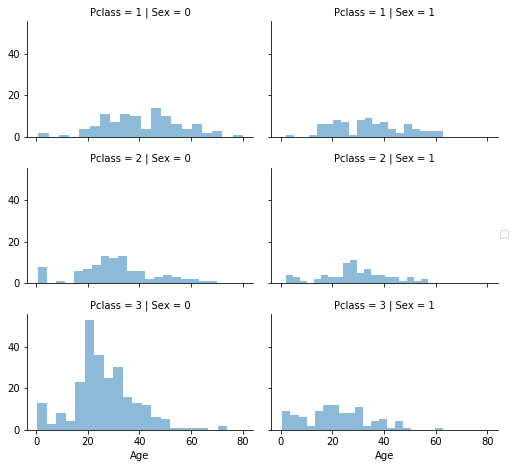

In [53]:
M = sns.FacetGrid(train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
M.map(plt.hist, 'Age', alpha=.5, bins=20)
M.add_legend()


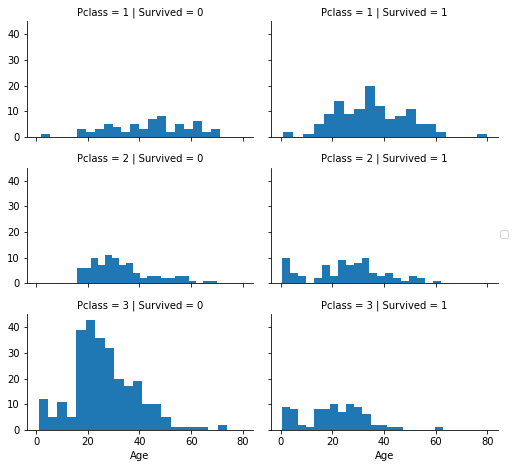

In [54]:

M = sns.FacetGrid(train, col = 'Survived', row='Pclass', size=2.2, aspect=1.6)
M.map(plt.hist, 'Age', bins=20)
M.add_legend();

C:\Users\A\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\A\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


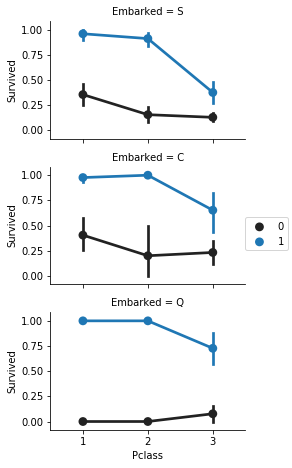

In [55]:
# visualize by Embarked
M = sns.FacetGrid(train, row = 'Embarked', size=2.2, aspect=1.6)
M.map(sns.pointplot, 'Pclass', 'Survived', 'Sex' )
M.add_legend()

C:\Users\A\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


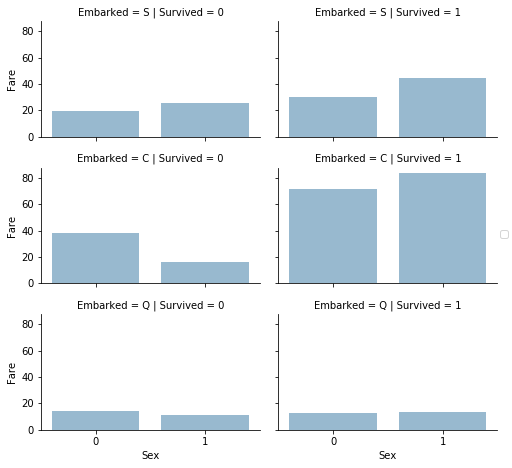

In [56]:
M = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
M.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
M.add_legend()

In [57]:
# what about Age missing values 
dataset1.Age.isnull().value_counts()

False    1046
True      263
Name: Age, dtype: int64

In [58]:
# Tittles and Age are related to each other 
# trnsfroem the median of ages and groubed with tittle approxmatley a fare prediction  
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 31.1+ KB


In [60]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 73.1+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null fl

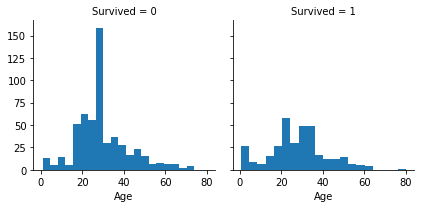

In [61]:
# visualize after the correctness
M = sns.FacetGrid(train, col = 'Survived')
M.map(plt.hist, 'Age', bins=20)

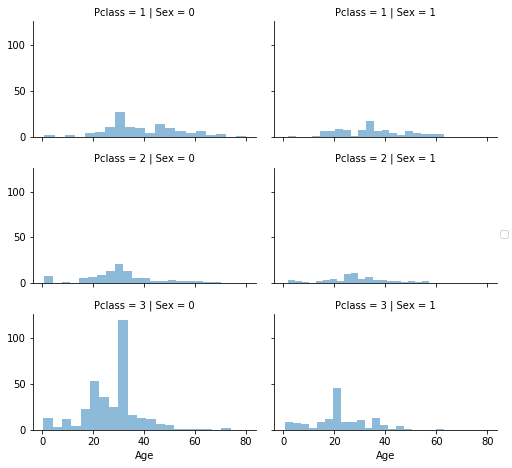

In [62]:
M = sns.FacetGrid(train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
M.map(plt.hist, 'Age', alpha=.5, bins=20)
M.add_legend()


In [63]:
for dataset in train_test:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [64]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


Embarked

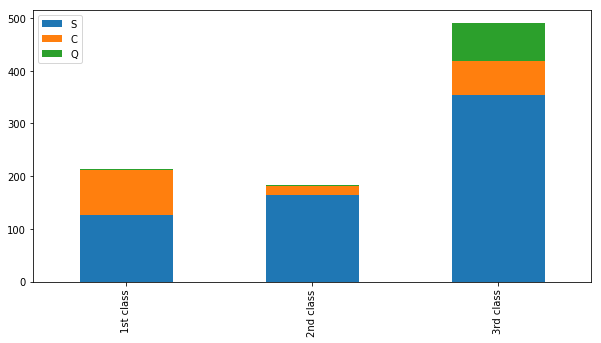

In [65]:
# what about embarked broke by Pclass since they related
# the shep has stoped in diffrent stations to carry on peaple
# so that explain the S, C and Q.
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
M = pd.DataFrame([Pclass1, Pclass2, Pclass3])
M.index = ['1st class','2nd class', '3rd class']
M.plot(kind='bar',stacked=True, figsize=(10,5))

In [66]:
# lets look at Embarked distrbuation and overll condtion
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [67]:
dataset1.Embarked.isnull().sum()

2

In [68]:
# lets filling in the missing values
for dataset in train:
    train['Embarked'] = train['Embarked'].fillna('S')

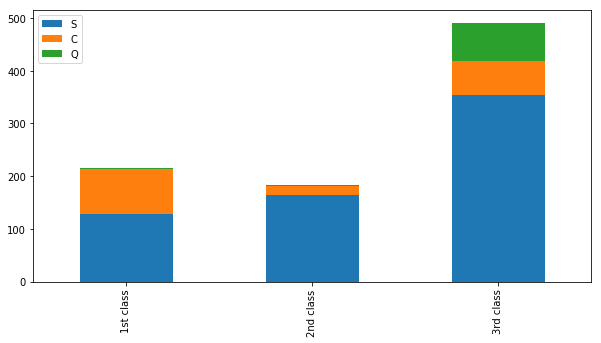

In [69]:
# what about embarked broke by Pclass since they related
# the shep has stoped in diffrent stations to carry on peaple
# so that explain the S, C and Q.
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
M = pd.DataFrame([Pclass1, Pclass2, Pclass3])
M.index = ['1st class','2nd class', '3rd class']
M.plot(kind='bar',stacked=True, figsize=(10,5))

In [70]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

fare

In [71]:
# what the describation of fare
# sombody has paid 500$ foe tilkect and that alot of moneu
train.Fare.describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [72]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)


In [73]:
for dataset in train_test:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

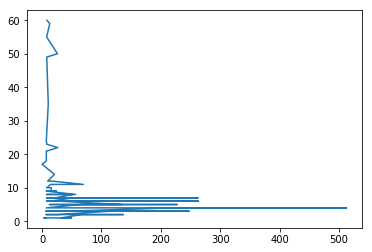

In [74]:
dataset1.Fare.value_counts().sort_values().plot( )

Cabine


In [75]:
# lets take a look at Cabin and get some insight
train.Cabin.value_counts().sum()

204

In [76]:
# what the distrbution of Cabin and missing vlaues
train.Cabin.describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [77]:
dataset1.Cabin.isnull().sum()

1014

In [78]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [79]:
for dataset in train_test:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [80]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [81]:
train.Cabin = train.Cabin.fillna('U', inplace=False)

In [82]:
test.Cabin = test.Cabin.fillna('U', inplace=True)

In [83]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,U,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,U,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,U,0,0


In [84]:
# more than half of cabin data are missing 
# fill in Cabin by Pclass it will approprite
 

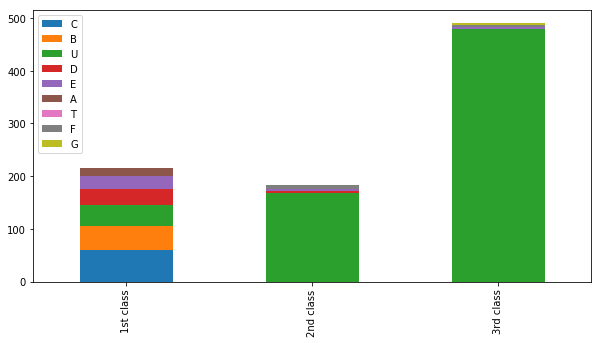

In [85]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
A = pd.DataFrame([Pclass1, Pclass2, Pclass3])
A.index = ['1st class','2nd class', '3rd class']
A.plot(kind='bar',stacked=True, figsize=(10,5))

In [86]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

Family Size

In [87]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [88]:
train['FamilySize'] = train.SibSp.values + train.Parch.values + 1
test['FamilySize'] = test.SibSp.values + test.Parch.values + 1

In [89]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0,2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0,1


In [90]:
for dataset in train_test:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000
